# Restaurants San Antonio

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt


# File to Load
file_path = Path("Restaurants_SanAntonio.csv")

# Read Restaurant Data File and store into Pandas DataFrame
restaurants_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
restaurants_df.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
0,34517,6,Fiesta Liquor #3,3.0,NaN,"African, Ethiopian, Vegetarian, Alcohol, Liquo...",$,29.574320,-98.515210,14415 Blanco Road,San Antonio,TX,78248.0
1,34518,5,Squeezers Juice Bar,5.0,11.0,"Black-owned, Juice and Smoothies, African, Hea...",NaN,29.441000,-98.485470,914 East Elmira Street,San Antonio,TX,78212.0
2,34520,76,Spinster Sisters Co. (427 Lombrano St),NaN,NaN,"Home &amp; Personal Care, Everyday Essentials,...",$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0
3,34521,194,Yaya's Thai Fusion,NaN,NaN,"Thai, Asian, Noodles",$,29.480652,-98.607908,5819 Northwest Loop 410,San Antonio,TX,78238.0
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0


In [2]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1215 non-null   int64  
 1   position     1215 non-null   int64  
 2   name         1215 non-null   object 
 3   score        672 non-null    float64
 4   ratings      671 non-null    float64
 5   category     1214 non-null   object 
 6   price_range  955 non-null    object 
 7   lat          1215 non-null   float64
 8   lng          1215 non-null   float64
 9   address      1215 non-null   object 
 10  city         1215 non-null   object 
 11  state        1215 non-null   object 
 12  zip_code     1214 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 123.5+ KB


In [3]:
# Check which columns have NaN values and how many NaN values are present in each column
nan_counts = restaurants_df.isnull().sum()

# Display the count of NaN values in each column
print(nan_counts)

id               0
position         0
name             0
score          543
ratings        544
category         1
price_range    260
lat              0
lng              0
address          0
city             0
state            0
zip_code         1
dtype: int64


In [4]:
# Removing rows with NaN values and storing the result in a new DataFrame
restaurants_df_cleaned = restaurants_df.dropna()

# Display the first few rows of the cleaned DataFrame
restaurants_df_cleaned.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0


In [5]:
restaurants_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 4 to 1214
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           558 non-null    int64  
 1   position     558 non-null    int64  
 2   name         558 non-null    object 
 3   score        558 non-null    float64
 4   ratings      558 non-null    float64
 5   category     558 non-null    object 
 6   price_range  558 non-null    object 
 7   lat          558 non-null    float64
 8   lng          558 non-null    float64
 9   address      558 non-null    object 
 10  city         558 non-null    object 
 11  state        558 non-null    object 
 12  zip_code     558 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 61.0+ KB


In [6]:
#Saving the file
restaurants_df_cleaned.to_csv("Output/restaurants_df.csv", index=False, header=True)

## Data Preparation

In [7]:
#Make a copy of the DF to edit for Linear Regression
clean_copy = restaurants_df_cleaned.copy()
clean_copy.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0


In [8]:
# position (Restaurant position in the search result)--keep
# score (Restaurant score)--going to drop this to predict it
# category (Restaurant category)--Maybe keep?? may mean we sacrifice clustering later on
# price_range (Restaurant price range - $ = Inexpensive, $$ = Moderately expensive, $$$ = Expensive, $$$$ = Very Expensive) - Source - stackoverflow
# zip_code (Zip code)--keep!

#drop uneccessary columns
clean_copy.drop(columns=['id','name','lat', 'lng', 'address', 'city', 'state'], inplace=True)
print(clean_copy)

      position  score  ratings  \
4          192    4.5     92.0   
8          190    4.2    167.0   
25         215    3.9     41.0   
28         171    4.8     11.0   
29         160    3.2     33.0   
...        ...    ...      ...   
1207       100    4.2     21.0   
1208        92    4.8    117.0   
1209        88    4.6     92.0   
1211        33    4.7    162.0   
1214       185    4.5    186.0   

                                               category price_range  zip_code  
4     American, Burgers, Family Friendly, Wings, Alc...           $   78224.0  
8                          American, Fast Food, Burgers           $   78221.0  
25                       American, Sandwiches, Desserts           $   78232.0  
28                        Sandwiches, American, Healthy          $$   78217.0  
29                            American, Mexican, Snacks          $$   78207.0  
...                                                 ...         ...       ...  
1207                           

In [9]:
#look at the category column to see if there are consistent values
clean_copy['category'].value_counts()

Mexican, Latin American, New Mexican                             22
Burgers, American, Sandwiches                                    17
Mexican, Tex Mex, Breakfast and Brunch, Family Meals              7
American, Burgers, Fast Food                                      6
Breakfast and Brunch, American, Sandwiches                        5
                                                                 ..
American, Diner                                                   1
Burgers, American, Sandwiches, Seafood, Bar Food, Cafe, Wings     1
Mexican, American                                                 1
American, Burgers, Comfort Food, Pasta, Sandwich                  1
Sandwich, Deli                                                    1
Name: category, Length: 390, dtype: int64

In [10]:
#check dtypes
clean_copy.dtypes

position         int64
score          float64
ratings        float64
category        object
price_range     object
zip_code       float64
dtype: object

In [11]:
clean_copy['score'].unique()

array([4.5, 4.2, 3.9, 4.8, 3.2, 4.6, 4.7, 4.4, 4.1, 3.3, 4.9, 5. , 4.3,
       4. , 3.8, 3.6, 3.5, 2.9, 3.7, 3.1, 3.4])

In [12]:
import math
#round the 'score' column before converting it to int
clean_copy["score"] = clean_copy["score"].apply(math.ceil)

In [13]:
#convert 'zip_code' to integer
clean_copy['zip_code']=clean_copy['zip_code'].astype(int)

# Convert score to int
clean_copy['score']=clean_copy['score'].astype(int)

#convert 'rating' to integer
clean_copy['ratings']=clean_copy['ratings'].astype(int)

In [14]:
#Use get_dummies to convert categorical columns to numerical values
dummy_price = pd.get_dummies(clean_copy['price_range'])
dummy_zip = pd.get_dummies(clean_copy['zip_code'])
dummy_category = pd.get_dummies(clean_copy['category'])

In [15]:
# Joining the new DataFrame back to the original one
data = pd.concat([clean_copy, dummy_price, dummy_zip, dummy_category], axis=1)

# Dropping the original 'price_range', category and 'zip_code' columns
data = data.drop('price_range', axis=1)
data = data.drop('zip_code', axis=1)
data = data.drop('category', axis=1)
data.head()

,position,score,ratings,$,$$,$$$,75038,78201,78202,78203,...,"Vietnamese, Noodles, Healthy, Asian, Bubble Tea, Family Meals","Vietnamese, Noodles, Healthy, Thai, Vegetarian, Soup, Pho, Rice &amp; Curry, Bubble Tea, Desserts, Local Specialities, Vegetarian Friendly","Vietnamese, Noodles, Healthy, Vegetarian, Vegetarian Friendly, Thai, Rice Dishes, Chinese, Pho","Vietnamese, Sandwich, Family Meals","Wings, American, Fast Food, Family Meals, Burgers","Wings, Chicken, American","pizza, Sandwich, Salads","wings, American, Burgers, Family Friendly","wings, American, Chicken, Family Friendly","wings, American, Comfort Food"
4,192,5,92,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,190,5,167,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,215,4,41,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,171,5,11,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,160,4,33,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.dtypes

position                                     int64
score                                        int32
ratings                                      int32
$                                            uint8
$$                                           uint8
                                             ...  
Wings, Chicken, American                     uint8
pizza, Sandwich, Salads                      uint8
wings, American, Burgers, Family Friendly    uint8
wings, American, Chicken, Family Friendly    uint8
wings, American, Comfort Food                uint8
Length: 440, dtype: object

In [17]:
# Split our preprocessed data into our features and target arrays
X = data.drop('score', axis=1)
y = data['score']

In [18]:
# Review the y variable Series
y.head()

4     5
8     5
25    4
28    5
29    4
Name: score, dtype: int32

In [19]:
# Review the X variable DataFrame
X.head()

,position,ratings,$,$$,$$$,75038,78201,78202,78203,78204,...,"Vietnamese, Noodles, Healthy, Asian, Bubble Tea, Family Meals","Vietnamese, Noodles, Healthy, Thai, Vegetarian, Soup, Pho, Rice &amp; Curry, Bubble Tea, Desserts, Local Specialities, Vegetarian Friendly","Vietnamese, Noodles, Healthy, Vegetarian, Vegetarian Friendly, Thai, Rice Dishes, Chinese, Pho","Vietnamese, Sandwich, Family Meals","Wings, American, Fast Food, Family Meals, Burgers","Wings, Chicken, American","pizza, Sandwich, Salads","wings, American, Burgers, Family Friendly","wings, American, Chicken, Family Friendly","wings, American, Comfort Food"
4,192,92,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,190,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,215,41,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,171,11,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,160,33,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Reformat data of the independent variable X as a single-column array
X.shape

(558, 439)

In [21]:
# Reformat data of the independent variable y as a single-column array
y.shape

(558,)

In [22]:
# Check the balance of our target values
target_value_counts = y.value_counts()
target_value_counts

5    515
4     41
3      2
Name: score, dtype: int64

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Separate the columns to be scaled from the rest of the DataFrame
columns_to_scale = ['position', 'ratings']
X_train_to_scale = data[columns_to_scale]
X_train_rest = data.drop(columns=columns_to_scale)

# Step 2: Initialize and fit the StandardScaler on the selected columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_to_scale)

# Step 3: Reconstruct the DataFrame with the scaled columns and the remaining columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
X_train = pd.concat([X_train_scaled_df, X_train_rest], axis=1)

#Set all the column names to str type
X_train.columns = [str(col) for col in X_train.columns]

# Assign 'score' as the target column for logistic regression
y_train = data['score']

In [24]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Create a Logistic Regression Model with the Original Data

In [25]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model using the modified DataFrame
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

C:\Users\muell\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(max_iter=2000)

### Make the Prediction Model

In [26]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

C:\Users\muell\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Logistical Regression Model Assessment

In [27]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Print the balanced_accuracy score of the model
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_accuracy)

Balanced Accuracy Score: 0.49612403100775193


In [28]:
# Generate a confusion matrix for the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  0  11]
 [  1 128]]


In [29]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred, zero_division=1)

print("Logistical Regression Classification Report:")
print(class_report)

Logistical Regression Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.92      0.99      0.96       129

    accuracy                           0.91       140
   macro avg       0.46      0.50      0.48       140
weighted avg       0.85      0.91      0.88       140



### Create a Logistic Regression Model with Resampled Training Data

In [30]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler = RandomOverSampler(random_state=1)

#Set all the column names to str type
X_train.columns = [str(col) for col in X_train.columns]

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = random_oversampler.fit_resample(X_train, y_train)

In [31]:
# Count the distinct values of the resampled labels data
label_counts = pd.Series(y_train_resampled).value_counts()
label_counts

5    386
4    386
3    386
Name: score, dtype: int64

In [32]:
# Instantiate the resampled Logistic Regression model
model = LogisticRegression(max_iter=2000)
                           
# Fit the model using the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred = model.predict(X_test)

C:\Users\muell\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\muell\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Resampled Logistical Regression Model Assessment

In [33]:
# Print the balanced_accuracy score of the model 
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_accuracy)

Balanced Accuracy Score: 0.6807610993657505


In [34]:
# Generate a confusion matrix for the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[  5   6]
 [ 12 117]]


In [35]:
# Print the classification report for the model
class_report = classification_report(y_test, y_pred, zero_division=1)

print("RandomOverSampler Classification Report:")
print(class_report)

RandomOverSampler Classification Report:
              precision    recall  f1-score   support

           4       0.29      0.45      0.36        11
           5       0.95      0.91      0.93       129

    accuracy                           0.87       140
   macro avg       0.62      0.68      0.64       140
weighted avg       0.90      0.87      0.88       140



## Make Predictions

In [36]:
# Predict outcomes for test data set
model = LogisticRegression(max_iter=2000)
model.fit(X_train_resampled, y_train_resampled)

predictions = model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

C:\Users\muell\anaconda4\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\muell\anaconda4\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Prediction,Actual
721,5,5
587,5,5
1011,5,5
621,4,4
1059,5,5
...,...,...
709,5,5
379,5,5
353,5,5
411,5,5


In [37]:
#Make a Prediction on a New Single Data Point

# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[1, 4]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# Predict the class (purple or yellow) of the new data point
new_prediction = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {new_prediction}")

## K-Means and Clustering

In [38]:
#Make a copy of the clean dataframe to use just for KMeans
kmeans_copy = restaurants_df_cleaned.copy()
kmeans_copy.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0


In [39]:
#drop uneccessary columns
kmeans_copy.drop(columns=['id', 'address', 'city', 'state', 'name'], inplace=True)
print(kmeans_copy)

      position  score  ratings  \
4          192    4.5     92.0   
8          190    4.2    167.0   
25         215    3.9     41.0   
28         171    4.8     11.0   
29         160    3.2     33.0   
...        ...    ...      ...   
1207       100    4.2     21.0   
1208        92    4.8    117.0   
1209        88    4.6     92.0   
1211        33    4.7    162.0   
1214       185    4.5    186.0   

                                               category price_range  \
4     American, Burgers, Family Friendly, Wings, Alc...           $   
8                          American, Fast Food, Burgers           $   
25                       American, Sandwiches, Desserts           $   
28                        Sandwiches, American, Healthy          $$   
29                            American, Mexican, Snacks          $$   
...                                                 ...         ...   
1207                                          Fast Food           $   
1208                   

In [ ]:
# import math
# #round the 'score' column before converting it to int
# kmeans_copy["score"] = kmeans_copy["score"].apply(math.ceil)

In [40]:
#convert 'zip_code' to integer
kmeans_copy['zip_code']=kmeans_copy['zip_code'].astype(int)

# Convert score to int
kmeans_copy['score']=kmeans_copy['score'].astype(int)

#convert 'rating' to integer
kmeans_copy['ratings']=kmeans_copy['ratings'].astype(int)

In [41]:
#Use get_dummies to convert categorical columns to numerical values
dummy_price = pd.get_dummies(kmeans_copy['price_range'])
dummy_zip = pd.get_dummies(kmeans_copy['zip_code'])
dummy_category = pd.get_dummies(kmeans_copy['category'])

In [42]:
# Joining the new DataFrame back to the original one
k_data = pd.concat([kmeans_copy, dummy_price, dummy_zip, dummy_category], axis=1)

# Dropping the original 'price_range', category and 'zip_code' columns
k_data = k_data.drop('price_range', axis=1)
k_data = k_data.drop('zip_code', axis=1)
k_data = k_data.drop('category', axis=1)
k_data.head()

,position,score,ratings,lat,lng,$,$$,$$$,75038,78201,...,"Vietnamese, Noodles, Healthy, Asian, Bubble Tea, Family Meals","Vietnamese, Noodles, Healthy, Thai, Vegetarian, Soup, Pho, Rice &amp; Curry, Bubble Tea, Desserts, Local Specialities, Vegetarian Friendly","Vietnamese, Noodles, Healthy, Vegetarian, Vegetarian Friendly, Thai, Rice Dishes, Chinese, Pho","Vietnamese, Sandwich, Family Meals","Wings, American, Fast Food, Family Meals, Burgers","Wings, Chicken, American","pizza, Sandwich, Salads","wings, American, Burgers, Family Friendly","wings, American, Chicken, Family Friendly","wings, American, Comfort Food"
4,192,4,92,29.350066,-98.537672,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,190,4,167,29.366126,-98.504588,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,215,3,41,29.611140,-98.477810,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,171,4,11,29.520260,-98.460730,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,160,3,33,29.441910,-98.510550,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
k_data['name'].value_counts()

In [43]:
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans

In [44]:
# Create and initialize the K-means model instance for 3 clusters
model = KMeans(n_clusters=5, random_state=42)

# Print the model
model

KMeans(n_clusters=5, random_state=42)

C:\Users\muell\anaconda4\lib\site-packages\sklearn\cluster\_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


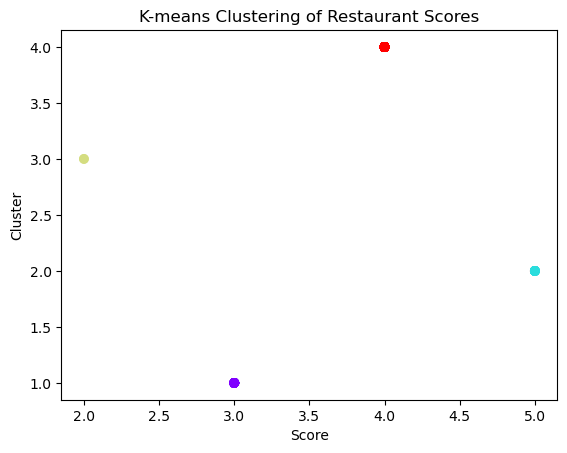

4    511
1     32
2     13
3      2
Name: cluster, dtype: int64


In [45]:
# Extract the score column for clustering
score_data = k_data[['score']]

# Initialize and fit the KMeans model
cluster_assignments = model.fit_predict(score_data)

# Add the cluster assignments back to the DataFrame
k_data['cluster'] = cluster_assignments

# Optional: Visualize the clusters
plt.scatter(score_data, cluster_assignments, c=cluster_assignments, cmap='rainbow')
plt.xlabel('Score')
plt.ylabel('Cluster')
plt.title('K-means Clustering of Restaurant Scores')
plt.show()

# Print the number of restaurants in each cluster
print(k_data['cluster'].value_counts())

In [ ]:
# Extract the score column for clustering
score_data = k_data[['score']]

# Initialize and fit the KMeans model
cluster_assignments = model.fit_predict(score_data)

# Add the cluster assignments back to the DataFrame
k_data['cluster'] = cluster_assignments

# Calculate the value counts for each cluster
cluster_counts = k_data['cluster'].value_counts().sort_index()

# Get unique cluster labels
unique_clusters = np.unique(cluster_assignments)

# Create a scatter plot for value counts
plt.scatter(unique_clusters, cluster_counts, color='b', marker='o', s=100)

# Adding labels and title to the plot
plt.xlabel('Cluster')
plt.ylabel('Value Count')
plt.title('Value Counts in Each Cluster')

# Display the scatter plot
plt.show()

In [46]:
k_data.head()

,position,score,ratings,lat,lng,$,$$,$$$,75038,78201,...,"Vietnamese, Noodles, Healthy, Thai, Vegetarian, Soup, Pho, Rice &amp; Curry, Bubble Tea, Desserts, Local Specialities, Vegetarian Friendly","Vietnamese, Noodles, Healthy, Vegetarian, Vegetarian Friendly, Thai, Rice Dishes, Chinese, Pho","Vietnamese, Sandwich, Family Meals","Wings, American, Fast Food, Family Meals, Burgers","Wings, Chicken, American","pizza, Sandwich, Salads","wings, American, Burgers, Family Friendly","wings, American, Chicken, Family Friendly","wings, American, Comfort Food",cluster
4,192,4,92,29.350066,-98.537672,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,190,4,167,29.366126,-98.504588,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
25,215,3,41,29.611140,-98.477810,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,171,4,11,29.520260,-98.460730,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
29,160,3,33,29.441910,-98.510550,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
k_data['cluster'].value_counts()

4    511
1     32
2     13
3      2
Name: cluster, dtype: int64

In [53]:
k_data.query("cluster==2")

,position,score,ratings,lat,lng,$,$$,$$$,75038,78201,...,"Vietnamese, Noodles, Healthy, Thai, Vegetarian, Soup, Pho, Rice &amp; Curry, Bubble Tea, Desserts, Local Specialities, Vegetarian Friendly","Vietnamese, Noodles, Healthy, Vegetarian, Vegetarian Friendly, Thai, Rice Dishes, Chinese, Pho","Vietnamese, Sandwich, Family Meals","Wings, American, Fast Food, Family Meals, Burgers","Wings, Chicken, American","pizza, Sandwich, Salads","wings, American, Burgers, Family Friendly","wings, American, Chicken, Family Friendly","wings, American, Comfort Food",cluster
127,50,5,23,29.496001,-98.480172,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
154,147,5,15,29.397821,-98.438759,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
386,163,5,25,29.609673,-98.511421,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
634,21,5,17,29.572500,-98.546720,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
651,86,5,28,29.511139,-98.387069,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
670,48,5,15,29.518757,-98.496380,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
691,10,5,114,29.604498,-98.537205,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
717,74,5,20,29.466720,-98.507610,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
727,62,5,29,29.510084,-98.379819,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
745,41,5,20,29.483824,-98.347580,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [54]:
restaurants_df_cleaned.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0


In [56]:
# Add the cluster assignments back to the DataFrame
restaurants_df_cleaned['cluster'] = cluster_assignments

restaurants_df_cleaned.head()

C:\Users\muell\AppData\Local\Temp\ipykernel_24708\951230075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_df_cleaned['cluster'] = cluster_assignments


,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code,cluster
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0,4
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0,4
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0,1
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0,4
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0,1


In [58]:
restaurants_df_cleaned.query("cluster==4")

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code,cluster
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0,4
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0,4
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0,4
30,34553,145,Sonic (6608 Fm 78),4.2,37.0,"Sandwich, Fast Food, burger, Hot Dog, American",$$,29.481780,-98.357660,6608 Fm 78,San Antonio,TX,78244.0,4
35,34558,78,El Pilon Sabor Boriqua,4.8,73.0,Puerto Rican,$,29.469805,-98.438646,1127 Harry Wurzbach Rd,San Antonio,TX,78209.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,35970,100,Church's Chicken (2026 South Alamo),4.2,21.0,Fast Food,$,29.413326,-98.503869,2026 S Alamo St,San Antonio,TX,78204.0,4
1208,35971,92,Five Guys TX-1098 1321 North Loop 1604 East,4.8,117.0,"American, Burgers, Fast Food",$,29.610843,-98.473864,1321 N Loop 1604 Suite 105,San Antonio,TX,78232.0,4
1209,35972,88,Taco Cabana (2347 E Southcross),4.6,92.0,"Mexican, Tex Mex, Breakfast and Brunch, Family...",$,29.375656,-98.457137,2347 E Southcross,San Antonio,TX,78223.0,4
1211,35976,33,Jason's Deli (1141 N. Fm 1604 East #108),4.7,162.0,"Burgers, American, Sandwiches",$,29.611254,-98.476393,1141 North FM 1604 East,San Antonio,TX,78232.0,4
